# **Performance of an ANN W.R.T several Gradient Descent Optimisers**
## - Visualising the Loss vs Epochs 
## - Visualising the Accuracy vs Epochs 

### Importing the Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

2023-10-06 22:43:14.179216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loading the Image Vectors Dataset

In [33]:
df = pd.read_csv('mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


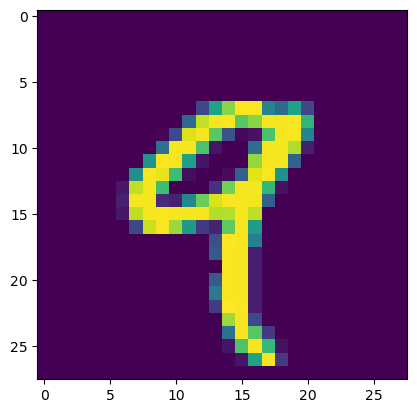

In [34]:
plt.imshow(df.iloc[4,1:].values.reshape(28,28))

In [35]:
df.iloc[0].unique()

array([  5,   0,   3,  18, 126, 136, 175,  26, 166, 255, 247, 127,  30,
        36,  94, 154, 170, 253, 225, 172, 242, 195,  64,  49, 238, 251,
        93,  82,  56,  39, 219, 198, 182, 241,  80, 156, 107, 205,  11,
        43,  14,   1,  90, 139, 190,   2,  70,  35, 160, 108,  81, 240,
       119,  25,  45, 186, 150,  27,  16, 252, 187, 249,  46, 130, 183,
       207, 148, 229, 250,  24, 114, 221, 201,  78,  23,  66, 213, 171,
         9,  55, 226, 244, 133, 212, 135, 132])

In [36]:
data = df.iloc[:,1:]
labels = df.iloc[:,0]

### Splitting the data to training and testing

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size = 0.2, random_state = 42)

### Scaling the Data using MinMaxScaler(0-1)

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
minMaxscaler = MinMaxScaler()
scaler = StandardScaler()

In [40]:
X_train_trf = minMaxscaler.fit_transform(X_train)
X_test_trf = minMaxscaler.transform(X_test)

### Dimensionality Reduction using PCA (784 -> 50 components)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)

In [42]:
X_train_trf = pca.fit_transform(X_train_trf)
X_test_trf = pca.transform(X_test_trf)

## Visualising the loss and accuracy of the model with different Optimizers

In [44]:
from tensorflow.keras import models,layers

In [51]:
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl', 'adamax']

# Create an empty dictionary to store training history and accuracy
loss_histories = {}
accuracy_histories = {}

epochs = 15
batch_size = 200

for optimizer_name in optimizers:
    
    Model1 = models.Sequential([
        layers.Dense(50, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ])
    
    Model1.compile(optimizer=optimizer_name,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
    
    history = Model1.fit(X_train_trf_mms, Y_train, batch_size=batch_size, epochs=epochs, verbose=0)
    loss_histories[optimizer_name] = history.history['loss']
    accuracy_histories[optimizer_name] = history.history['accuracy']

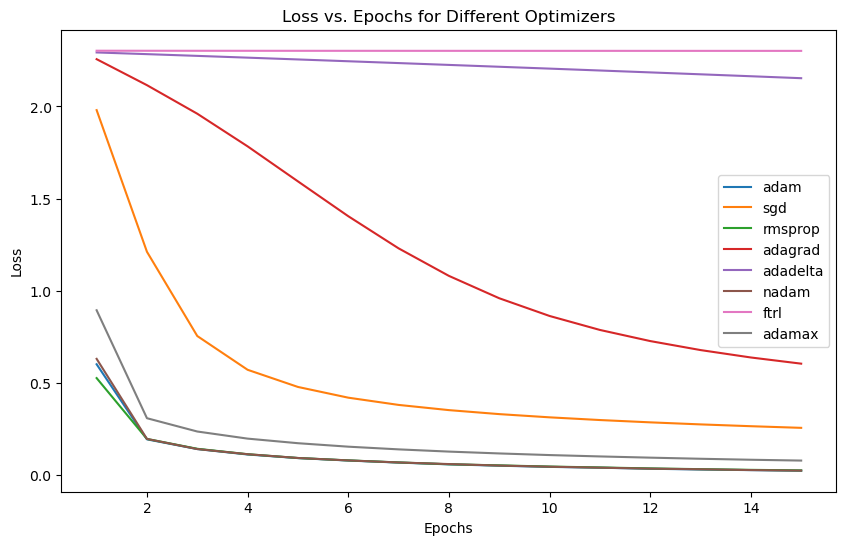

In [52]:
plt.figure(figsize=(10, 6))
for optimizer_name, loss_history in loss_histories.items():
    plt.plot(range(1, epochs + 1), loss_history, label=optimizer_name)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Different Optimizers')
plt.legend()
plt.show()

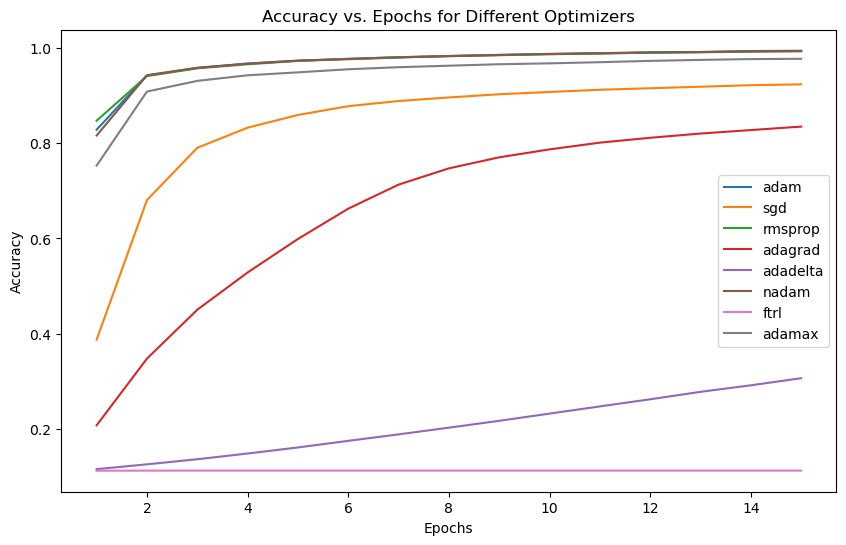

In [55]:
plt.figure(figsize=(10, 6))
for optimizer_name, accuracy_history in accuracy_histories.items():
    plt.plot(range(1, epochs + 1), accuracy_history, label=optimizer_name)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs for Different Optimizers')
plt.legend()
plt.show()